<a href="https://colab.research.google.com/github/jeanraice/Home-price-prediction/blob/main/Home_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Import The data frame
> Bloc en retrait



In [27]:
import pandas as pd 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
data_frame = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_frame



,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


##Transforme the data frame in array with numpy 

In [80]:
import numpy as np
data_array_1 = data_frame.values[::2,:]
data_array_2 = data_frame.values[1::2,:1]
dataset_X = np.hstack([data_array_1,data_array_2])
dataset_Y = np.hstack(data_frame.values[1::2,2])
dataset_X.shape,dataset_Y.shape

((506, 12), (506,))

##Data Analysis

Now we going to search the parameter on dataset_X which alllows us to have the best prediction for dataset-Y

In [86]:
import sklearn
from sklearn.feature_selection import f_regression,SelectKBest

selec=SelectKBest(f_regression,k=1)

selec.fit(dataset_X, dataset_Y)
bestParameter=dataset_X[:,selec.get_support()]





##plot the graph between the best parameter given by sklearn and the data to predict in order to see how the are correlated

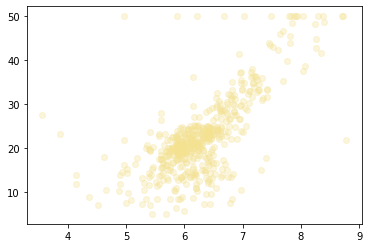

In [87]:
import matplotlib.pyplot as plt
plt.scatter(bestParameter, dataset_Y, color='#F4E29150')
plt.show()

##Let's check if there are linearly correlated 

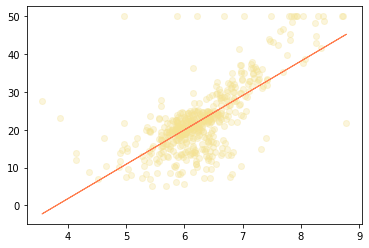

In [88]:
from sklearn.linear_model import LinearRegression
reg  = LinearRegression()
reg.fit(bestParameter,dataset_Y)
plt.scatter(bestParameter, dataset_Y, color='#F4E29150')
plt.plot(bestParameter, reg.predict(bestParameter), color='#FF7F50', linewidth=1)
plt.show()




##We can see that the linear regression don't match very well with our data distribution. Let's Check others methods 

##SMV

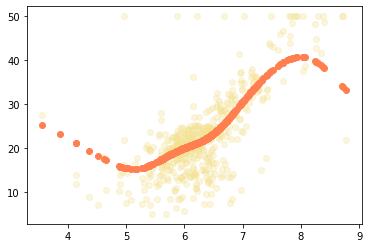

In [89]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(bestParameter,dataset_Y)
plt.scatter(bestParameter, dataset_Y, color='#F4E29150')
plt.scatter(bestParameter, reg.predict(bestParameter), color='#FF7F50')
plt.show()




###The result of the SVM is good comparing to the the linear regression but not enough for have a good prediction

##Let's try another method :"Random Forest" to check the result

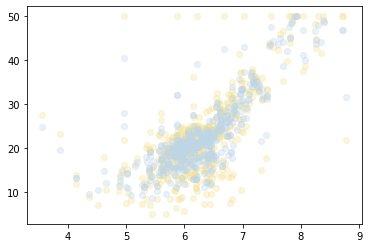

In [91]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(bestParameter,dataset_Y)
plt.scatter(bestParameter, dataset_Y, color='#F4E29150')
plt.scatter(bestParameter, reg.predict(bestParameter), color='#BDD5EA50')
plt.show()



You can see that the Random Foret Method will give a good prediction.